In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics,ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [11]:
data = pd.read_csv('/content/drive/MyDrive/housing.csv',header=None, delimiter=r"\s+", names=column_names)

In [12]:

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
x = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [16]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [17]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [18]:

data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [19]:
scaler=MinMaxScaler()

In [20]:
scaler.fit(data)

MinMaxScaler()

In [21]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
reg1=DecisionTreeRegressor(max_depth=5)

In [24]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
91,0.03932,0.0,3.41,0,0.489,6.405,73.9,3.0921,2,270.0,17.8,393.55,8.20
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284.0,15.5,394.74,5.49
278,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254.0,17.6,396.90,7.19
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384.0,20.9,394.47,13.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304.0,18.4,396.24,9.97
269,0.09065,20.0,6.96,1,0.464,5.920,61.5,3.9175,3,223.0,18.6,391.34,13.65
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666.0,20.2,127.36,26.64


In [25]:
reg1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [26]:
cross_val_score(reg1, x, y, cv=10)

array([ 0.5959353 ,  0.78397197, -0.69265482,  0.59738823,  0.78765881,
        0.3150221 ,  0.31287234,  0.40914651, -2.01131821,  0.00212657])

In [27]:

reg1.predict(x, check_input=True)

array([25.22714286, 25.22714286, 34.17272727, 34.17272727, 34.17272727,
       25.22714286, 20.70657895, 27.1       , 19.2       , 19.2       ,
       19.2       , 20.70657895, 27.1       , 20.64      , 20.70657895,
       20.64      , 20.64      , 20.70657895, 20.70657895, 20.70657895,
       15.27567568, 20.70657895, 15.27567568, 15.27567568, 15.27567568,
       15.27567568, 20.70657895, 15.27567568, 20.70657895, 20.70657895,
       15.27567568, 20.70657895, 18.94      , 15.27567568, 15.27567568,
       20.64      , 20.70657895, 20.64      , 20.70657895, 25.22714286,
       34.17272727, 25.22714286, 25.22714286, 25.22714286, 20.64      ,
       20.70657895, 20.70657895, 19.2       , 19.2       , 19.2       ,
       20.70657895, 20.64      , 25.22714286, 20.64      , 20.70657895,
       34.17272727, 25.22714286, 34.17272727, 25.22714286, 20.64      ,
       20.70657895, 20.70657895, 25.22714286, 25.22714286, 30.03076923,
       25.22714286, 20.70657895, 20.64      , 20.70657895, 20.64

In [28]:
y_pred=reg1.predict(x_test)

In [29]:
reg1.score(x_test,y_test)

0.810610034226974

In [30]:
mse=mean_squared_error(y_test,y_pred)
mse

15.033778106192528

In [31]:
import math
rmse=math.sqrt(mse)
rmse

3.8773416287699654

**Random Forest Regressor**

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=150
                            
                            , random_state=10)
rfreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=10)

In [33]:
rfy_pred=rfreg.predict(x_test)

In [34]:
rfreg.score(x_test,y_test)

0.8612341904257902

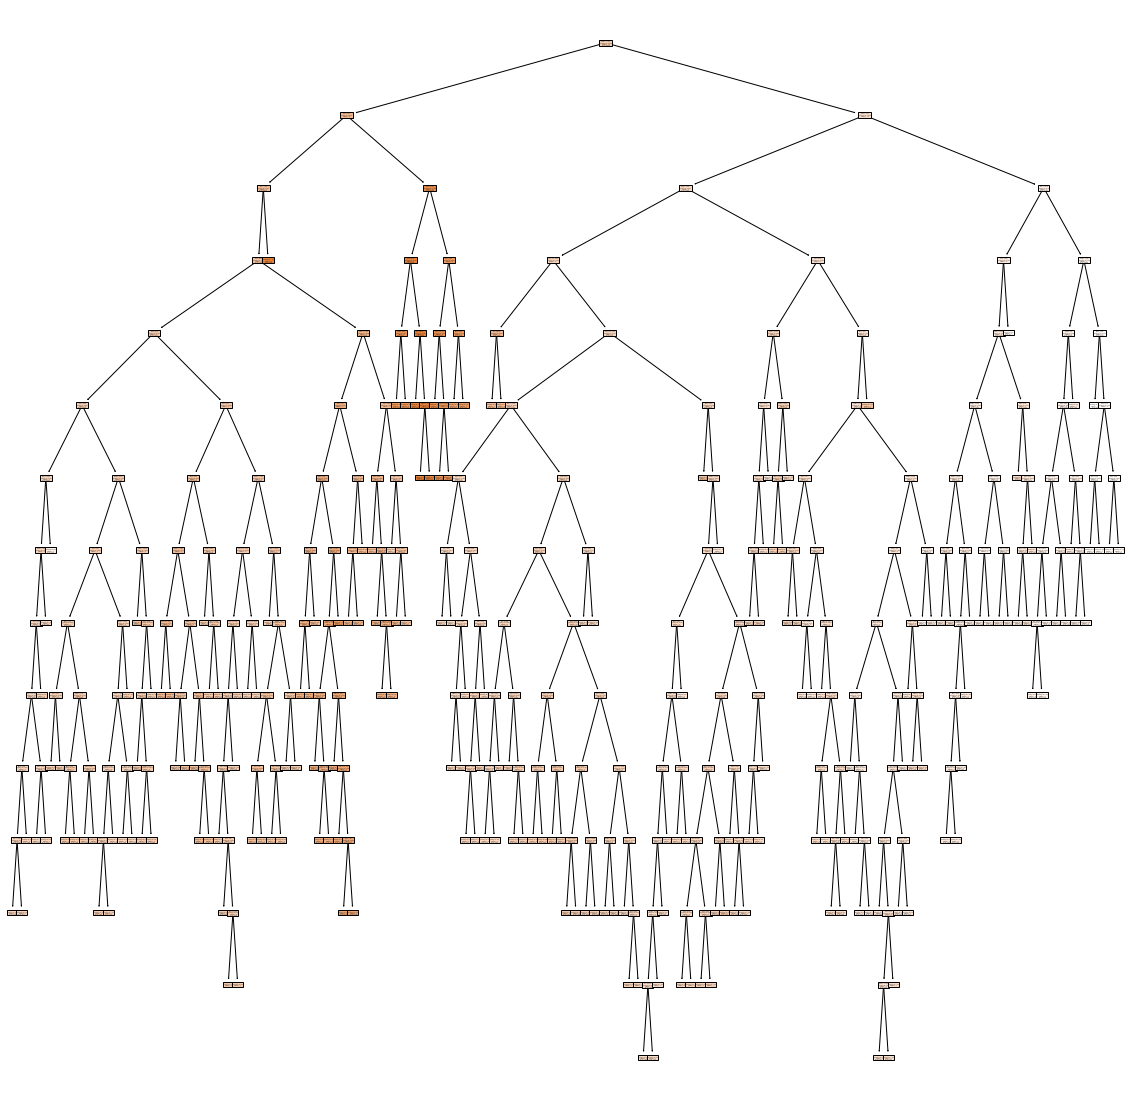

In [35]:
from sklearn import tree
 # will be used for tree visualization
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfreg.estimators_[0], feature_names=x.columns, filled=True)

**Bagged Regressor**

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
mlr=LinearRegression()
reg=mlr.fit(x_train,y_train) 

In [38]:
from sklearn.ensemble import BaggingRegressor
breg= BaggingRegressor(n_estimators=20, random_state=0)

In [39]:
breg.fit(x_train,y_train)

BaggingRegressor(n_estimators=20, random_state=0)

In [40]:
breg.score(x_test,y_test)

0.8484319072392226

Gradient boosting


In [41]:
data1=data.copy()

In [42]:
learning_rate=0.5

In [43]:
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [44]:
def grad_boost(x_train,x_test,y_test):
  ycap_train = np.repeat(y_train.mean(),x_train.shape[0])
  ycap_test = np.repeat(y_train.mean(),x_test.shape[0])
  residuals = y_train - ycap_train

  for i in range(3):
    model = DecisionTreeRegressor(max_depth=2)
    model.fit(x_train,residuals)
    ycap_train += 0.5 * model.predict(x_train)
    ycap_test += 0.5 * model.predict(x_test)
    residuals = y_train - ycap_train
  return ycap_test


In [45]:
len(y_pred)

152

In [46]:
a=grad_boost(x_train,x_test,y_train)

r2_score(y_test,a)

0.7286022499033012

In [47]:
mse=mean_squared_error(y_test,a)
mse

21.543557161647556

Gradient boosting with lib


In [48]:
grad = ensemble.GradientBoostingRegressor(n_estimators=15,learning_rate=0.1)
grad.fit(x_train,y_train)
grad.score(x_test,y_test)

0.7995488723260126